In [1]:
from trueskill import *
import pandas as pd

In [2]:
def sort_ranks(d):
    return sorted(d.items(), key=operator.itemgetter(1))

In [3]:
# need ids
#ids = [1,4,12,13,22,35,46,104,158]
ids = [0,1,2,4,5,6,12,16,19, 22]

# need to read id pairs and selection from a file
#data = pd.read_csv('motionDatasetSpeedGaitTimeSyntheticHappy.csv', lineterminator='\n')
data = pd.read_csv('syntheticExperiments\\motionDatasetBodyAngleSpeedSyntheticHappy.csv', lineterminator='\n')
data.rename(columns={"FFPType\r": "FFPType"},inplace=True)

In [4]:
#sub_df = pd.read_csv('syntheticDataSpeedGaitTimeHappyRankings.csv', lineterminator='\n')
sub_df = pd.read_csv('syntheticExperiments\\syntheticDataBodyAngleSpeedHappyRankings.csv', lineterminator='\n')
sub_df.rename(columns={"id2\r": "id2"},inplace=True)

In [5]:
def ts_result(id1, id2, ratings, drawn):
    new_id1, new_id2 = rate_1vs1(ratings[id1], ratings[id2], drawn)
    ratings[id1] = new_id1
    ratings[id2] = new_id2

In [6]:
# initialize ratings
designs = ids
ts_ratings = {d:Rating() for d in designs}
ts_ratings

{0: trueskill.Rating(mu=25.000, sigma=8.333),
 1: trueskill.Rating(mu=25.000, sigma=8.333),
 2: trueskill.Rating(mu=25.000, sigma=8.333),
 4: trueskill.Rating(mu=25.000, sigma=8.333),
 5: trueskill.Rating(mu=25.000, sigma=8.333),
 6: trueskill.Rating(mu=25.000, sigma=8.333),
 12: trueskill.Rating(mu=25.000, sigma=8.333),
 16: trueskill.Rating(mu=25.000, sigma=8.333),
 19: trueskill.Rating(mu=25.000, sigma=8.333),
 22: trueskill.Rating(mu=25.000, sigma=8.333)}

In [7]:
# then, we go through each of the comparisons and add them to the model
for i, row in sub_df.iterrows():
    #print(row)
    if row.activeSelection == 0: # draw
        ts_result(row.id1, row.id2, ts_ratings, drawn=True)
    elif row.activeSelection == 1: # id1 wins
        ts_result(row.id1, row.id2, ts_ratings, drawn=False)
    elif row.activeSelection == 2: # id2 wins
        ts_result(row.id2, row.id1, ts_ratings, drawn=False)
        
#ranks = ranking_ts_dict(ts_ratings) # rank is sorting based on score..

In [8]:
ts_ratings

{0: trueskill.Rating(mu=26.301, sigma=3.876),
 1: trueskill.Rating(mu=29.260, sigma=3.834),
 2: trueskill.Rating(mu=12.497, sigma=3.868),
 4: trueskill.Rating(mu=30.091, sigma=3.770),
 5: trueskill.Rating(mu=38.747, sigma=4.260),
 6: trueskill.Rating(mu=17.883, sigma=3.447),
 12: trueskill.Rating(mu=20.466, sigma=3.563),
 16: trueskill.Rating(mu=14.410, sigma=3.343),
 19: trueskill.Rating(mu=34.893, sigma=4.051),
 22: trueskill.Rating(mu=19.986, sigma=3.517)}

In [9]:
# looping over the dimensions
rankings = {}
raw_values = {}

#rankings = ranks
raw_values = ts_ratings

# We'd like to have some sort of DF which has all the summary values for each of the designs
design_df = pd.DataFrame()
design_df['id'] = ids
design_df = design_df.set_index(['id'])

e = "happy"

#design_df[e + "_rank"] = design_df.index.to_series().map(rankings[e])
design_df[e + "_ts"] = design_df.index.to_series().map(raw_values)
design_df[e + "_score"] = design_df[e + "_ts"].apply(lambda x: expose(x))
design_df[e + "_mu"] = design_df[e + "_ts"].apply(lambda x: x.mu)
design_df[e + "_sigma"] = design_df[e + "_ts"].apply(lambda x: x.sigma)
design_df["id"] = ids

In [10]:
design_df

happy_ts  happy_score   happy_mu  \
id                                                                     
0   trueskill.Rating(mu=26.301, sigma=3.876)    14.673601  26.300608   
1   trueskill.Rating(mu=29.260, sigma=3.834)    17.758194  29.259830   
2   trueskill.Rating(mu=12.497, sigma=3.868)     0.892445  12.496886   
4   trueskill.Rating(mu=30.091, sigma=3.770)    18.780970  30.091275   
5   trueskill.Rating(mu=38.747, sigma=4.260)    25.967968  38.746739   
6   trueskill.Rating(mu=17.883, sigma=3.447)     7.543130  17.882666   
12  trueskill.Rating(mu=20.466, sigma=3.563)     9.777256  20.466021   
16  trueskill.Rating(mu=14.410, sigma=3.343)     4.379984  14.409839   
19  trueskill.Rating(mu=34.893, sigma=4.051)    22.740179  34.892702   
22  trueskill.Rating(mu=19.986, sigma=3.517)     9.436151  19.986197   

    happy_sigma  id  
id                   
0      3.875669   0  
1      3.833879   1  
2      3.868147   2  
4      3.770101   4  
5      4.259590   5  
6      3.446512   6  
12     3.562921  12  
16     3.343285  16  
19     4.050841  19  
22     3.516682  22

In [11]:
#sorted_ranks = sort_ranks(rankings)

In [12]:
data

id snapshot_image thumbnail_image  bodyAngleX  bodyAngleZ  frontKneesAngle  \
0   0          shot0           shot0           0    0.092845         0.927295   
1   1          shot1           shot1           0   -0.341507         0.927295   
2   2          shot2           shot2           0    0.415263         0.927295   
3   4          shot4           shot4           0   -0.066477         0.927295   
4   5          shot5           shot5           0   -0.468007         0.927295   
5   6          shot6           shot6           0    0.286784         0.927295   
6  12         shot12          shot12           0   -0.181402         0.927295   
7  16         shot16          shot16           0    0.467388         0.927295   
8  19         shot19          shot19           0   -0.133653         0.927295   
9  22         shot22          shot22           0    0.069941         0.927295   

   rearKneesAngle  frontAnkle  rearAnkle  frontHipsAngle   ...     \
0        0.927295   -0.927295  -0.927295       -0.394791   ...      
1        0.927295   -0.927295  -0.927295       -0.394791   ...      
2        0.927295   -0.927295  -0.927295       -0.394791   ...      
3        0.927295   -0.927295  -0.927295       -0.394791   ...      
4        0.927295   -0.927295  -0.927295       -0.394791   ...      
5        0.927295   -0.927295  -0.927295       -0.394791   ...      
6        0.927295   -0.927295  -0.927295       -0.394791   ...      
7        0.927295   -0.927295  -0.927295       -0.394791   ...      
8        0.927295   -0.927295  -0.927295       -0.394791   ...      
9        0.927295   -0.927295  -0.927295       -0.394791   ...      

   rearLegSpread  legAsymmetry  avgSwFtHt  avgBodyHt  frontMotionAsymmetry  \
0       4.810556      0.783124      0.008   0.208369              0.000012   
1       6.745907      1.641970      0.008   0.203807              0.000070   
2       4.171249      2.963181      0.008   0.199075              0.000010   
3       4.662912      0.218778      0.008   0.222955              0.000014   
4       7.281955      1.202180      0.008   0.187047              0.000012   
5       5.139855      1.377709      0.008   0.201977              0.000010   
6       5.418506      1.808725      0.008   0.223183              0.000032   
7       5.796372      1.549075      0.008   0.179023              0.000755   
8       5.252040      0.128473      0.008   0.211730              0.000005   
9       3.815949      0.416791      0.008   0.230101              0.000015   

   rearMotionAsymmetry  outputSpeed      cost  timeTaken  FFPType  
0             0.000009     0.357327  1.493147  28.925961        0  
1             0.000020     0.174297  0.450832  51.044824        0  
2             0.000031     0.052116  0.150292  36.440884        0  
3             0.000005     0.191995  0.446312  11.025628        0  
4             0.000004     0.299786  1.149274  25.754245        0  
5             0.000014     0.285941  1.009878  30.796867        0  
6             0.000002     0.047491  0.072416  29.636589        0  
7             0.000812     0.360715  1.651409  32.092497        0  
8             0.000010     0.316340  1.176727  25.755275        0  
9             0.000006     0.059631  0.063748  20.540880        0  

[10 rows x 27 columns]

In [13]:
#data["speed"]

In [14]:
#data["gaitDuration"]

In [15]:
# combinedMetric = data["speed"]/data["gaitDuration"]
# combined_df = pd.DataFrame(combinedMetric,data.index, columns =["combined"])
# combined_df

combinedMetric = data["speed"].apply(lambda x: pow(x,1)) - data["bodyAngleZ"]#.apply(lambda x: pow(x,3))
combined_df = pd.DataFrame(combinedMetric,data.index, columns =["combined"])
combined_df

combined
0  0.332403
1  0.548410
2 -0.351006
3  0.294684
4  0.821622
5  0.052436
6  0.239010
7 -0.035886
8  0.509083
9  0.001509

In [16]:
data_all = pd.concat([data, combined_df], axis = 1,join_axes=[data.index])

In [17]:
data_all

id snapshot_image thumbnail_image  bodyAngleX  bodyAngleZ  frontKneesAngle  \
0   0          shot0           shot0           0    0.092845         0.927295   
1   1          shot1           shot1           0   -0.341507         0.927295   
2   2          shot2           shot2           0    0.415263         0.927295   
3   4          shot4           shot4           0   -0.066477         0.927295   
4   5          shot5           shot5           0   -0.468007         0.927295   
5   6          shot6           shot6           0    0.286784         0.927295   
6  12         shot12          shot12           0   -0.181402         0.927295   
7  16         shot16          shot16           0    0.467388         0.927295   
8  19         shot19          shot19           0   -0.133653         0.927295   
9  22         shot22          shot22           0    0.069941         0.927295   

   rearKneesAngle  frontAnkle  rearAnkle  frontHipsAngle    ...     \
0        0.927295   -0.927295  -0.927295       -0.394791    ...      
1        0.927295   -0.927295  -0.927295       -0.394791    ...      
2        0.927295   -0.927295  -0.927295       -0.394791    ...      
3        0.927295   -0.927295  -0.927295       -0.394791    ...      
4        0.927295   -0.927295  -0.927295       -0.394791    ...      
5        0.927295   -0.927295  -0.927295       -0.394791    ...      
6        0.927295   -0.927295  -0.927295       -0.394791    ...      
7        0.927295   -0.927295  -0.927295       -0.394791    ...      
8        0.927295   -0.927295  -0.927295       -0.394791    ...      
9        0.927295   -0.927295  -0.927295       -0.394791    ...      

   legAsymmetry  avgSwFtHt  avgBodyHt  frontMotionAsymmetry  \
0      0.783124      0.008   0.208369              0.000012   
1      1.641970      0.008   0.203807              0.000070   
2      2.963181      0.008   0.199075              0.000010   
3      0.218778      0.008   0.222955              0.000014   
4      1.202180      0.008   0.187047              0.000012   
5      1.377709      0.008   0.201977              0.000010   
6      1.808725      0.008   0.223183              0.000032   
7      1.549075      0.008   0.179023              0.000755   
8      0.128473      0.008   0.211730              0.000005   
9      0.416791      0.008   0.230101              0.000015   

   rearMotionAsymmetry  outputSpeed      cost  timeTaken  FFPType  combined  
0             0.000009     0.357327  1.493147  28.925961        0  0.332403  
1             0.000020     0.174297  0.450832  51.044824        0  0.548410  
2             0.000031     0.052116  0.150292  36.440884        0 -0.351006  
3             0.000005     0.191995  0.446312  11.025628        0  0.294684  
4             0.000004     0.299786  1.149274  25.754245        0  0.821622  
5             0.000014     0.285941  1.009878  30.796867        0  0.052436  
6             0.000002     0.047491  0.072416  29.636589        0  0.239010  
7             0.000812     0.360715  1.651409  32.092497        0 -0.035886  
8             0.000010     0.316340  1.176727  25.755275        0  0.509083  
9             0.000006     0.059631  0.063748  20.540880        0  0.001509  

[10 rows x 28 columns]

In [18]:
dataSorted = data_all.sort_values("combined", ascending=True, inplace = False)

In [19]:
dataSorted

id snapshot_image thumbnail_image  bodyAngleX  bodyAngleZ  frontKneesAngle  \
2   2          shot2           shot2           0    0.415263         0.927295   
7  16         shot16          shot16           0    0.467388         0.927295   
9  22         shot22          shot22           0    0.069941         0.927295   
5   6          shot6           shot6           0    0.286784         0.927295   
6  12         shot12          shot12           0   -0.181402         0.927295   
3   4          shot4           shot4           0   -0.066477         0.927295   
0   0          shot0           shot0           0    0.092845         0.927295   
8  19         shot19          shot19           0   -0.133653         0.927295   
1   1          shot1           shot1           0   -0.341507         0.927295   
4   5          shot5           shot5           0   -0.468007         0.927295   

   rearKneesAngle  frontAnkle  rearAnkle  frontHipsAngle    ...     \
2        0.927295   -0.927295  -0.927295       -0.394791    ...      
7        0.927295   -0.927295  -0.927295       -0.394791    ...      
9        0.927295   -0.927295  -0.927295       -0.394791    ...      
5        0.927295   -0.927295  -0.927295       -0.394791    ...      
6        0.927295   -0.927295  -0.927295       -0.394791    ...      
3        0.927295   -0.927295  -0.927295       -0.394791    ...      
0        0.927295   -0.927295  -0.927295       -0.394791    ...      
8        0.927295   -0.927295  -0.927295       -0.394791    ...      
1        0.927295   -0.927295  -0.927295       -0.394791    ...      
4        0.927295   -0.927295  -0.927295       -0.394791    ...      

   legAsymmetry  avgSwFtHt  avgBodyHt  frontMotionAsymmetry  \
2      2.963181      0.008   0.199075              0.000010   
7      1.549075      0.008   0.179023              0.000755   
9      0.416791      0.008   0.230101              0.000015   
5      1.377709      0.008   0.201977              0.000010   
6      1.808725      0.008   0.223183              0.000032   
3      0.218778      0.008   0.222955              0.000014   
0      0.783124      0.008   0.208369              0.000012   
8      0.128473      0.008   0.211730              0.000005   
1      1.641970      0.008   0.203807              0.000070   
4      1.202180      0.008   0.187047              0.000012   

   rearMotionAsymmetry  outputSpeed      cost  timeTaken  FFPType  combined  
2             0.000031     0.052116  0.150292  36.440884        0 -0.351006  
7             0.000812     0.360715  1.651409  32.092497        0 -0.035886  
9             0.000006     0.059631  0.063748  20.540880        0  0.001509  
5             0.000014     0.285941  1.009878  30.796867        0  0.052436  
6             0.000002     0.047491  0.072416  29.636589        0  0.239010  
3             0.000005     0.191995  0.446312  11.025628        0  0.294684  
0             0.000009     0.357327  1.493147  28.925961        0  0.332403  
8             0.000010     0.316340  1.176727  25.755275        0  0.509083  
1             0.000020     0.174297  0.450832  51.044824        0  0.548410  
4             0.000004     0.299786  1.149274  25.754245        0  0.821622  

[10 rows x 28 columns]

In [20]:
scoreSorted = design_df.sort_values(["happy_score"], ascending = True)

In [21]:
scoreSorted

happy_ts  happy_score   happy_mu  \
id                                                                     
2   trueskill.Rating(mu=12.497, sigma=3.868)     0.892445  12.496886   
16  trueskill.Rating(mu=14.410, sigma=3.343)     4.379984  14.409839   
6   trueskill.Rating(mu=17.883, sigma=3.447)     7.543130  17.882666   
22  trueskill.Rating(mu=19.986, sigma=3.517)     9.436151  19.986197   
12  trueskill.Rating(mu=20.466, sigma=3.563)     9.777256  20.466021   
0   trueskill.Rating(mu=26.301, sigma=3.876)    14.673601  26.300608   
1   trueskill.Rating(mu=29.260, sigma=3.834)    17.758194  29.259830   
4   trueskill.Rating(mu=30.091, sigma=3.770)    18.780970  30.091275   
19  trueskill.Rating(mu=34.893, sigma=4.051)    22.740179  34.892702   
5   trueskill.Rating(mu=38.747, sigma=4.260)    25.967968  38.746739   

    happy_sigma  id  
id                   
2      3.868147   2  
16     3.343285  16  
6      3.446512   6  
22     3.516682  22  
12     3.562921  12  
0      3.875669   0  
1      3.833879   1  
4      3.770101   4  
19     4.050841  19  
5      4.259590   5

In [22]:
#dataSortedSpeed = data_all.sort_values("speed", ascending=True, inplace = False)

In [26]:
import matplotlib.pyplot as plt

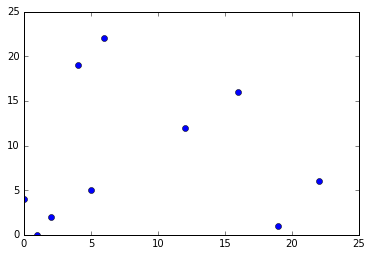

In [30]:
plt.plot(scoreSorted['id'], dataSorted['id'],'o')
plt.show()